In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Outcome is a feature we will be predicting:
### 0 - means no diabetes
### 1 - means there is diabetes

### Check if there are NAN values in the data

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
print('Diabetes data has {} columns and {} rows'.format(df.shape[1], df.shape[0]))

Diabetes data has 9 columns and 768 rows


In [8]:
counts = df['Outcome'].value_counts().reset_index()
counts.columns = ['Outcome','Counts']
counts

,Outcome,Counts
0,0,500
1,1,268


### The data shows more no-diabetes records than diabetes records

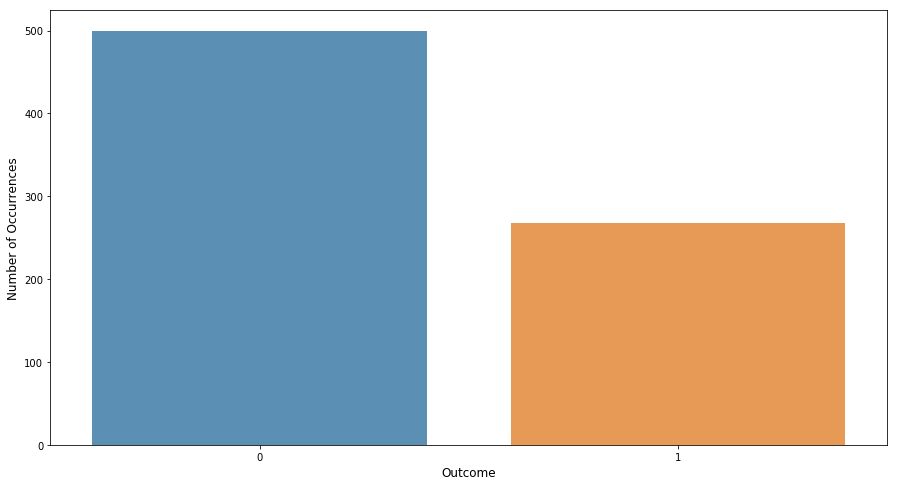

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(counts.Outcome, counts.Counts, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Outcome', fontsize=12)
plt.show()

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Machine learning algorithms to use for prediction are:
### K-Nearest Neighbors, Decision Trees, and Multi Layer Perceptron classifier

# Prepare data for classification

In [12]:
x = df.iloc[:, 0:8]
y = df.iloc[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify= df.Outcome, random_state=66)

## K-Nearest Neighbors

In [14]:
training_accuracy = []
testing_accuracy = []

In [15]:
neighbors = range(1,20)
for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))

### Plot different tested n_neighbors against accuracy to choose the optimal value

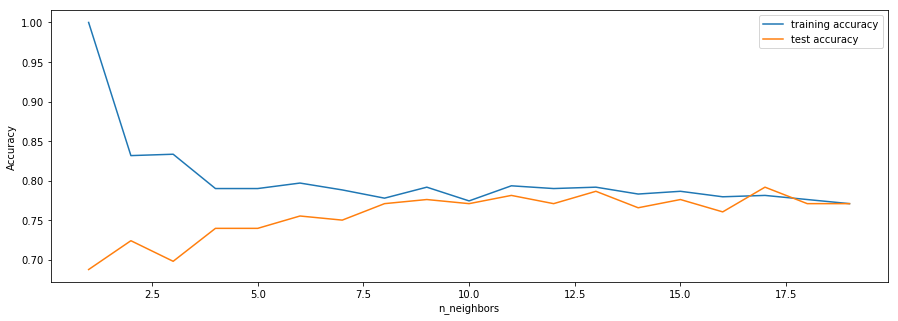

In [16]:
plt.figure(figsize=(15,5))
plt.plot(neighbors, training_accuracy, label="training accuracy")
plt.plot(neighbors, testing_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### From the figure it seems the sweet spot is with n_neighbors = 11

In [17]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
print('KNN accuracy evaluates to {:.2f}'.format(knn.score(X_test, y_test)))

KNN accuracy evaluates to 0.78


## Decision Trees

In [18]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Tree accuracy evaluates to {:.3f} on training data'.format(tree.score(X_train, y_train)))
print('Tree accuracy evaluates to {:.3f} on testing data'.format(tree.score(X_test, y_test)))

Tree accuracy evaluates to 1.000 on training data
Tree accuracy evaluates to 0.714 on testing data


#### Accuracy on training set indicate overfitting, while performing poorly on the training set due model not generalising well
#### To counter this, we can experiment with max depth of the tree to lower accuracy on the training set and increasing on the testing set.

In [19]:
training_accuracy = []
testing_accuracy = []

In [20]:
depth = range(1,10)
for max_depth in depth:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state = 0)
    tree.fit(X_train, y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    testing_accuracy.append(tree.score(X_test, y_test))

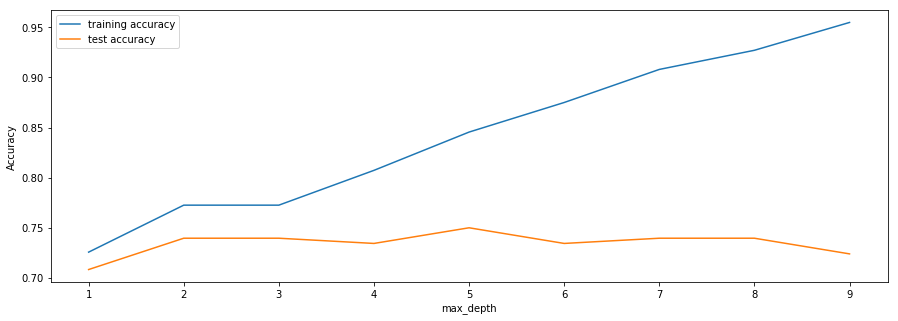

In [21]:
plt.figure(figsize=(15,5))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, testing_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

In [22]:
tree = DecisionTreeClassifier(max_depth = 5, random_state=0)
tree.fit(X_train, y_train)
print('Tree accuracy evaluates to {:.3f} on testing data'.format(tree.score(X_test, y_test)))

Tree accuracy evaluates to 0.750 on testing data


#### To measure the importance of each feature used in the decisions the classifier makes, feature_importance_ provides a number between 0 and 1, with 0 denoting 'feature not significant in predicting the target' and 1 'significant in predicting the target'.

(-1, 8)

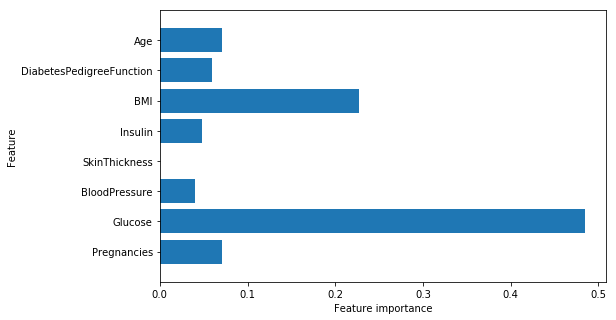

In [23]:
plt.figure(figsize=(8,5))
n_features = 8
diabetes_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                     'BMI','DiabetesPedigreeFunction','Age']
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), diabetes_features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
    

## Deep Learning: MultiLayer Perceptrons

##### Input features in Deep Learning are expected to have a mean of 0 and a variance of 1. So we will first re-scale the data using StandardScaler() to adhere to this requirement.

In [24]:
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
mlp = MLPClassifier(random_state = 0)
mlp.fit(X_trained_scaled, y_train)
print('MLP accuracy evaluates to {:.3f} on training data'.format(mlp.score(X_trained_scaled, y_train)))
print('MLP accuracy evaluates to {:.3f} on testing data'.format(mlp.score(X_test_scaled, y_test)))

MLP accuracy evaluates to 0.823 on training data
MLP accuracy evaluates to 0.802 on testing data


#### We can vary few parameters to investigate the impact on model accuracy

In [26]:
training_accuracy = []
testing_accuracy = []

In [27]:
iterations = [200, 500, 700, 1000]
for max_iter in iterations:
    mlp = MLPClassifier(max_iter = max_iter, alpha = 1, random_state = 0)
    mlp.fit(X_trained_scaled, y_train)
    training_accuracy.append(mlp.score(X_trained_scaled, y_train))
    testing_accuracy.append(mlp.score(X_test_scaled, y_test))

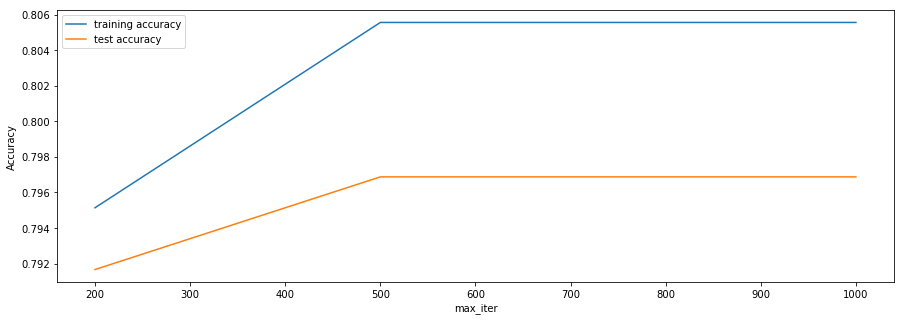

In [28]:
plt.figure(figsize=(15,5))
plt.plot(iterations, training_accuracy, label="training accuracy")
plt.plot(iterations, testing_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_iter")
plt.legend()